In [1]:
from data_retriever import DataRetriever
from pre_processing import PreProcessing
from scalers.min_max import MinMax
from regressors.lstm_regressor import LSTMRegressor
from regressors.esn_regressor import ESNRegressor
import pandas as pd
from model_evaluator import ModelEvaluator
import numpy as np
import tensorflow as tf
import tensorflow_addons as tfa
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.layers import Dense, LSTM
from keras.models import Sequential
from config import Config
from statsmodels.tsa.stattools import adfuller

[*********************100%***********************]  7 of 7 completed
Learning to predict stock : ITUB3.SA_Close
Saving picture from results of prediction of predicted only :ITUB3.SA_Close , using model : ESN


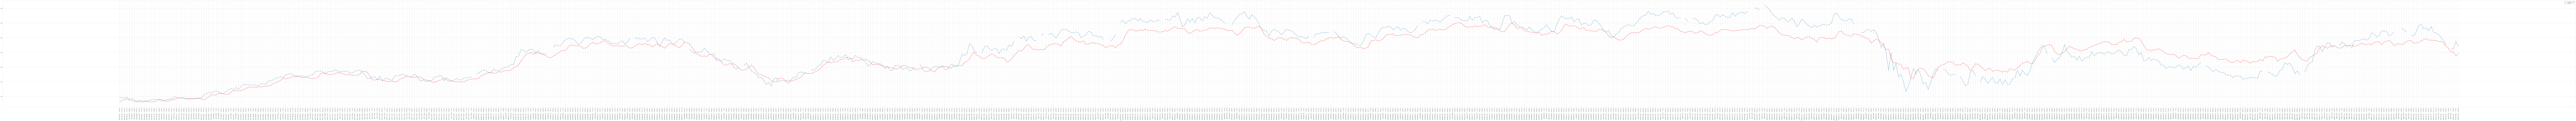

In [2]:
#Retrieving data from yahoo API
a = DataRetriever()
a.get_yahoo_stock_data()

#Defining which stocks will be predicted
#x_cols_ = [x for x in b.columns.difference(['Date']) if x[-5:] == 'Close']
predict_cols = ['ITUB3.SA_Close']

#Training a model for each stock to be predicted
for i in predict_cols:
    print('Learning to predict stock : ' + i)

    #Obtaining yahoo dataset
    dataset = a.get_stock_ds()
    
    #Setting up column to be predicted
    y_cols = i
    #Setting up column to be used as features
    x_cols = dataset.columns.difference(['Date'] + list(y_cols))
    
    #Preprocessing yahoo data
    pp = PreProcessing(dataset, MinMax)
    train, test = pp.pre_process()

    #Training model to preprocessed data
    #reg = LSTMRegressor(ds=train, xcols=x_cols, y_cols=y_cols, n_inputs=7, n_features=len(x_cols), epochs=50)
    reg = ESNRegressor(ds=train, x_cols=x_cols, y_cols=y_cols, n_inputs=7, n_features=len(x_cols), epochs=50)
    reg.fit_generator()
    
    #Predicting data with trained model
    reg_pred = reg.predict_generator(test)
    
    #Adding predicted data to original dataset
    reg_pred = pp._scalers[y_cols].inverse_transform(reg_pred)
    pred = pd.DataFrame(reg_pred)
    pred.columns = ['Prediction']
    begin_idx  = len(dataset) - len(pred)
    finish_idx = len(dataset) - 1
    pred.index = list(range(begin_idx, finish_idx + 1))
    dataset = dataset.join(pred)

    #Evaluating model
    me = ModelEvaluator(model_name='ESN', 
                        data_set=dataset, 
                        pred_col='Prediction', 
                        y_col=y_cols, 
                        x_col='Date'
                        )
    #me.plot_results(False, True)
    me.plot_results_predicted(False, True)

In [3]:
train

,Date,ABEV3.SA_Open,ABEV3.SA_High,ABEV3.SA_Low,ABEV3.SA_Close,B3SA3.SA_Open,B3SA3.SA_High,B3SA3.SA_Low,B3SA3.SA_Close,AAPL_Open,...,B3SA3.SA_STOCHk_14_3_3,B3SA3.SA_STOCHd_14_3_3,AAPL_STOCHk_14_3_3,AAPL_STOCHd_14_3_3,MSFT_STOCHk_14_3_3,MSFT_STOCHd_14_3_3,AMZN_STOCHk_14_3_3,AMZN_STOCHd_14_3_3,7011.T_STOCHk_14_3_3,7011.T_STOCHd_14_3_3
0,2010-01-04,0.018290,0.024269,0.017043,0.027438,0.735941,0.778650,0.765914,0.784948,0.020713,...,0.363788,0.391792,0.178102,0.194092,0.075763,0.083039,0.175001,0.180304,0.068269,0.149702
1,2010-01-05,0.025277,0.026821,0.027030,0.029210,0.788019,0.789340,0.806064,0.788763,0.021864,...,0.363788,0.391792,0.178102,0.194092,0.075763,0.083039,0.175001,0.180304,0.068269,0.149702
2,2010-01-06,0.026568,0.028745,0.028007,0.032301,0.784956,0.827517,0.811575,0.826155,0.021647,...,0.363788,0.391792,0.178102,0.194092,0.075763,0.083039,0.175001,0.180304,0.068269,0.149702
3,2010-01-07,0.032602,0.030158,0.030001,0.033738,0.813293,0.854242,0.840704,0.850574,0.019061,...,0.363788,0.391792,0.178102,0.194092,0.075763,0.083039,0.175001,0.180304,0.068269,0.149702
4,2010-01-08,0.031213,0.031434,0.031057,0.033148,0.850820,0.851188,0.855662,0.826155,0.017635,...,0.363788,0.391792,0.178102,0.194092,0.075763,0.083039,0.175001,0.180304,0.068269,0.149702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1926,2017-05-29,0.956587,0.942968,0.962260,0.949228,0.442572,0.435767,0.464348,0.442276,0.984679,...,0.615605,0.594673,0.629048,0.687713,0.848122,0.749267,0.944688,0.969313,0.115183,0.775116
1927,2017-05-30,0.948811,0.937201,0.946644,0.933803,0.438506,0.438132,0.454943,0.436198,0.980257,...,0.645416,0.625609,0.629048,0.687713,0.848122,0.749267,0.944688,0.969313,0.073895,0.775116
1928,2017-05-31,0.942332,0.933356,0.935582,0.928661,0.438167,0.436443,0.439966,0.418642,0.984450,...,0.594519,0.626346,0.629048,0.687713,0.848122,0.749267,0.944688,0.969313,0.076575,0.068482
1929,2017-06-01,0.936500,0.930152,0.929726,0.918378,0.423258,0.426984,0.441011,0.422694,0.978352,...,0.552348,0.604985,0.629048,0.687713,0.848122,0.749267,0.944688,0.969313,0.111359,0.067150


In [16]:
test.to_numpy().reshape((len(test.columns), 7))

ValueError: cannot reshape array of size 74256 into shape (78,7)

In [7]:
len(reg_pred)

945

In [8]:
952 - 7

945